Dataset Derived from


https://github.com/allisonhorst/palmerpenguins
https://allisonhorst.github.io/palmerpenguins/


## Will create a model, test it and then save it to read in the saved file



In [1]:
#!pwd

In [2]:
import numpy as np
import pandas as pd
import streamlit as st

df = pd.read_csv('./Projects/App_008_001/App_008_001_Exported/Data/penguins_cleaned.csv')

### Predicting species, given the input parameters
target = 'species'
#encode = ['island','sex']
encode = ['sex', 'island']




In [3]:
df02 = df[['sex', 'island']]
df02

df02 = pd.get_dummies(df02, drop_first=True).astype('int')
df02.head()

,sex_male,island_Dream,island_Torgersen
0,1,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,1


In [4]:
df03 = pd.concat([df, df02], axis=1)
df03 = df03.drop(columns=['island','sex'], axis=1)
df03

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_male,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181,3750,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1
2,Adelie,40.3,18.0,195,3250,0,0,1
3,Adelie,36.7,19.3,193,3450,0,0,1
4,Adelie,39.3,20.6,190,3650,1,0,1
...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207,4000,1,1,0
329,Chinstrap,43.5,18.1,202,3400,0,1,0
330,Chinstrap,49.6,18.2,193,3775,1,1,0
331,Chinstrap,50.8,19.0,210,4100,1,1,0


In [5]:
### Encoding Target 'species'

## Creating how it will be modified
## Creating the function
## Applying the function
target_mapper = {'Adelie':0,
                 'Chinstrap':1,
                 'Gentoo':2}

def target_encode(val):
    return target_mapper[val]

## Note: It is apply(target_encode) and not apply(target_encode())
df03['species'] = df03['species'].apply(target_encode)


In [6]:
df03['species'].unique()
##array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

## Verifying if encoder worked correctly
df03['species'][224:230]
df03['species'][114:120]


114    0
115    0
116    0
117    0
118    0
119    0
Name: species, dtype: int64

In [9]:
## X and y

X = df03.drop(columns=['species'], axis=1)
y = df03['species']


### Train Test Split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    train_size=None,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)

len(X), len(X_train), len(X_test), len(X_train)+len(X_test)


(333, 266, 67, 333)

In [10]:
X.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_male,island_Dream,island_Torgersen
0,39.1,18.7,181,3750,1,0,1
1,39.5,17.4,186,3800,0,0,1


In [14]:


print(X.aggregate({'min','max','mean', 'std', 'median'}).transpose())
#                          mean  median         std
#bill_length_mm       43.992793    44.5    5.468668
#bill_depth_mm        17.164865    17.3    1.969235
#flipper_length_mm   200.966967   197.0   14.015765
#body_mass_g        4207.057057  4050.0  805.215802
#sex_male              0.504505     1.0    0.500732
#island_Dream          0.369369     0.0    0.483360
#island_Torgersen      0.141141     0.0    0.348691


#X.columns
##['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
##       'sex_male', 'island_Dream', 'island_Torgersen']

                          std     min         mean     max  median
bill_length_mm       5.468668    32.1    43.992793    59.6    44.5
bill_depth_mm        1.969235    13.1    17.164865    21.5    17.3
flipper_length_mm   14.015765   172.0   200.966967   231.0   197.0
body_mass_g        805.215802  2700.0  4207.057057  6300.0  4050.0
sex_male             0.500732     0.0     0.504505     1.0     1.0
island_Dream         0.483360     0.0     0.369369     1.0     0.0
island_Torgersen     0.348691     0.0     0.141141     1.0     0.0


In [19]:
print(X.aggregate(['min','max','mean']).transpose())

                      min     max         mean
bill_length_mm       32.1    59.6    43.992793
bill_depth_mm        13.1    21.5    17.164865
flipper_length_mm   172.0   231.0   200.966967
body_mass_g        2700.0  6300.0  4207.057057
sex_male              0.0     1.0     0.504505
island_Dream          0.0     1.0     0.369369
island_Torgersen      0.0     1.0     0.141141


In [ ]:
import numpy as np
import pandas as pd
import streamlit as st

df = pd.read_csv('./Projects/App_008_001/App_008_001_Exported/Data/penguins_cleaned.csv')

### Predicting species, given the input parameters
target = 'species'
#encode = ['island','sex']
encode = ['sex', 'island']


df02 = df[['sex', 'island']]
df02

df02 = pd.get_dummies(df02, drop_first=True).astype('int')
df02.head()

df03 = pd.concat([df, df02], axis=1)
df03 = df03.drop(columns=['island','sex'], axis=1)
df03

df03['species'].unique()
##array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

### Encoding Target 'species'

## Creating how it will be modified
## Creating the function
## Applying the function

target_mapper = {'Adelie':0,
                 'Chinstrap':1,
                 'Gentoo':2}

def target_encode(val):
    return target_mapper[val]

## Note: It is apply(target_encode) and not apply(target_encode())
df03['species'] = df03['species'].apply(target_encode)


## Verifying if encoder worked correctly
df03['species'][224:230]
df03['species'][114:120]

## X and y

X = df03.drop(columns=['species'], axis=1)
y = df03['species']


### Train Test Split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    train_size=None,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)

#X.head(2)

#X.columns
##['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
##       'sex_male', 'island_Dream', 'island_Torgersen']

### ML Models

### Random Forest


In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.943 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.981 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.925 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.943 total time=   0.0s
[CV 1/5] END ....................n_estimators=2;, score=0.926 total time=   0.0s
[CV 2/5] END ....................n_estimators=2;, score=0.962 total time=   0.0s
[CV 3/5] END ....................n_estimators=2;, score=0.962 total time=   0.0s
[CV 4/5] END ....................n_estimators=2;, score=0.849 total time=   0.0s
[CV 5/5] END ....................n_estimators=2;, score=0.943 total time=   0.0s
[CV 1/5] END ....................n_estimators=3;, score=0.963 total time=   0.0s
[CV 2/5] END ....................n_estimators=

NameError: name 'plt' is not defined

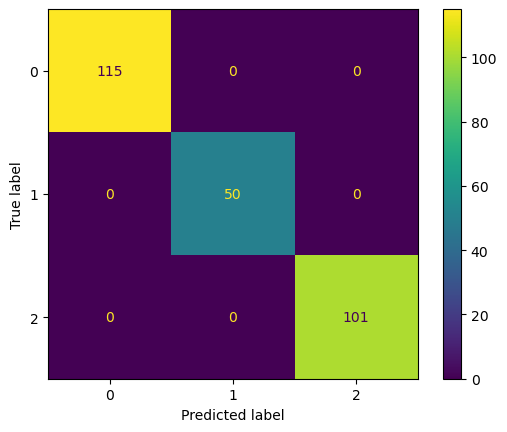

In [21]:

### Grid Search - Random Forest

### Model - Default
model_forest_01_to_grid = RandomForestClassifier(n_estimators=100,
                                            criterion='gini',
                                            max_depth=None,
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            bootstrap=True,
                                            oob_score=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,
                                            warm_start=False,
                                            class_weight=None,
                                            ccp_alpha=0.0,
                                            max_samples=None)

n_estimators = range(1,101)

param_grid_model_forest_01_grid = {'n_estimators':n_estimators}

model_forest_01_grid = GridSearchCV(estimator=model_forest_01_to_grid,
                                    param_grid=param_grid_model_forest_01_grid,
                                    scoring=None,
                                    n_jobs=None,
                                    refit=True,
                                    cv=None,## Default None = 5
                                    verbose=3,
                                    pre_dispatch='2*n_jobs',
                                    return_train_score=False)

model_forest_01_grid.fit(X_train, y_train)

### Model Predictions
model_forest_01_grid_preds_test = model_forest_01_grid.predict(X_test)

### Model Metrics
accuracy_score_model_forest_01_grid = accuracy_score(y_true=y_test, y_pred=model_forest_01_grid_preds_test, normalize=True, sample_weight=None)
error_rt_accuracy_score_model_forest_01_grid = 1 - accuracy_score_model_forest_01_grid

print(classification_report(y_true=y_test, y_pred=model_forest_01_grid_preds_test,labels=None,
                      target_names=None,
                      sample_weight=None,
                      digits=2,
                      output_dict=False,
                      zero_division='warn'))

print(confusion_matrix(y_true=y_test, y_pred=model_forest_01_grid_preds_test,labels=None,sample_weight=None,normalize=None))

ConfusionMatrixDisplay.from_estimator(estimator=model_forest_01_grid, X=X_train, y=y_train,
                                      labels=None,
                                      sample_weight=None,
                                      normalize=None,
                                      display_labels=None,
                                      include_values=True,
                                      xticks_rotation='horizontal',
                                      values_format=None,
                                      cmap='viridis',
                                      ax=None,
                                      colorbar=True)

plt.figure(figsize=(8,6))
plt.scatter(accuracy_score_model_forest_01_grid.index, accuracy_score_model_forest_01_grid)
plt.scatter(error_rt_accuracy_score_model_forest_01_grid.index, error_rt_accuracy_score_model_forest_01_grid)
plt.show()




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]






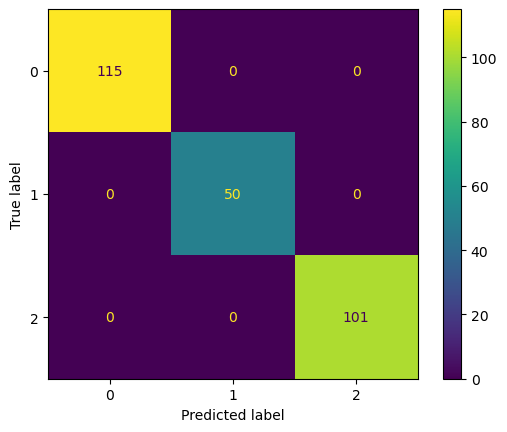

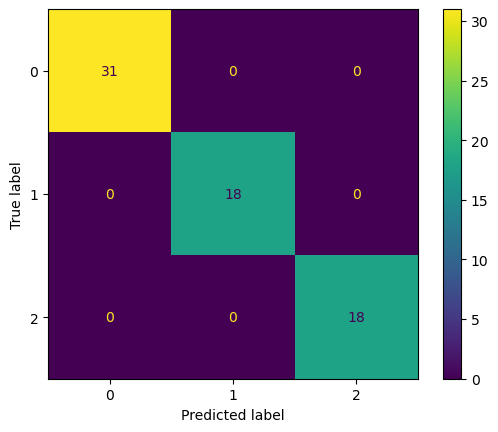

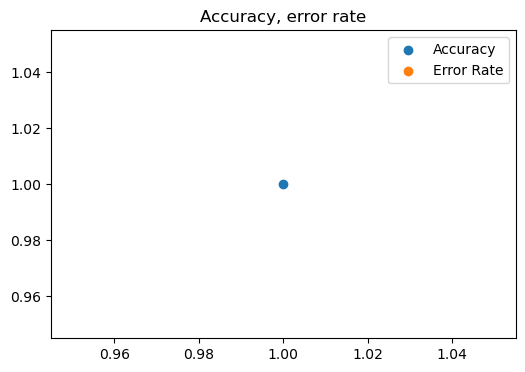

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
print(classification_report(y_true=y_test, y_pred=model_forest_01_grid_preds_test,labels=None,
                      target_names=None,
                      sample_weight=None,
                      digits=2,
                      output_dict=False,
                      zero_division='warn'))
print("\n")
print(confusion_matrix(y_true=y_test, y_pred=model_forest_01_grid_preds_test,labels=None,sample_weight=None,normalize=None))
print("\n")
ConfusionMatrixDisplay.from_estimator(estimator=model_forest_01_grid,
                                      X=X_train, y=y_train,
                                      labels=None,
                                      sample_weight=None,
                                      normalize=None,
                                      display_labels=None,
                                      include_values=True,
                                      xticks_rotation='horizontal',
                                      values_format=None,
                                      cmap='viridis',
                                      ax=None,
                                      colorbar=True)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=model_forest_01_grid_preds_test,
                                        labels=None,
                                        sample_weight=None,
                                        normalize=None,
                                        display_labels=None,
                                        include_values=True,
                                        xticks_rotation='horizontal',
                                        values_format=None,
                                        cmap='viridis',
                                        ax=None,
                                        colorbar=True,)

print("\n")

fig = plt.figure(figsize=(6,4))
plt.scatter(accuracy_score_model_forest_01_grid, accuracy_score_model_forest_01_grid, label='Accuracy')
plt.scatter(error_rt_accuracy_score_model_forest_01_grid, error_rt_accuracy_score_model_forest_01_grid, label='Error Rate')

plt.title("Accuracy, error rate")
plt.legend()

plt.show()

###97% of accuracy
### f1 score is good for all
### the model had 2 missclassiciations on the True label 1. 


## Decision
### the model's performance is good. I will use this model but will train it with the entire dataset



In [23]:
print(f"param_grid: {model_forest_01_grid.param_grid}")

print(f"get_params: {model_forest_01_grid.get_params}")
print(f"best_estimator_: {model_forest_01_grid.best_estimator_}")
print(f"best_params_: {model_forest_01_grid.best_params_}")


param_grid: {'n_estimators': range(1, 101)}
get_params: <bound method BaseEstimator.get_params of GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 101)}, verbose=3)>
best_estimator_: RandomForestClassifier(n_estimators=34)
best_params_: {'n_estimators': 34}


## Model with {'n_estimators': 19}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

[[146   0   0]
 [  0  68   0]
 [  0   0 119]]


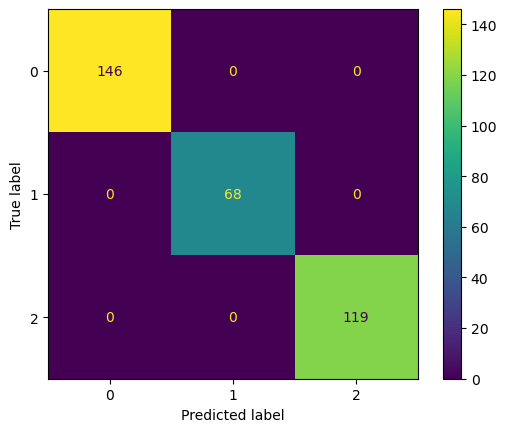

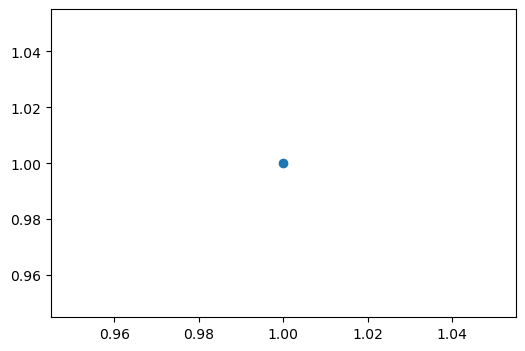



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



[[146   0   0]
 [  0  68   0]
 [  0   0 119]]








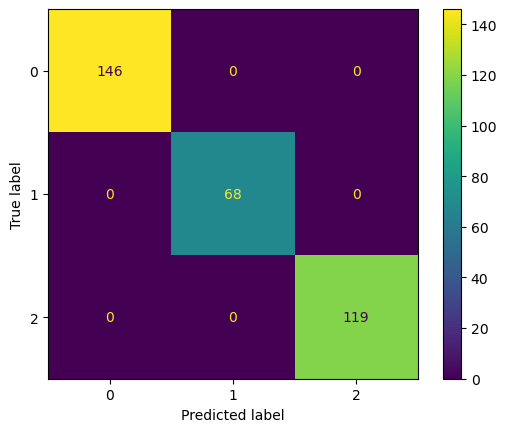

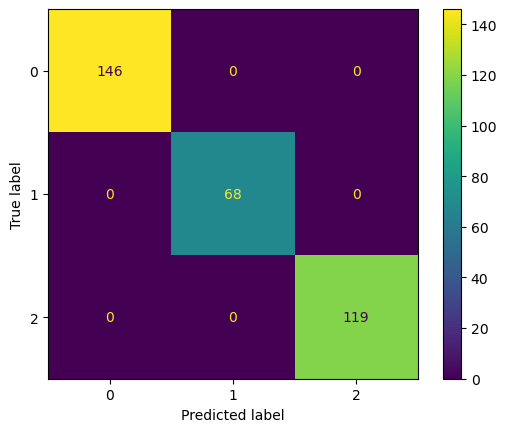

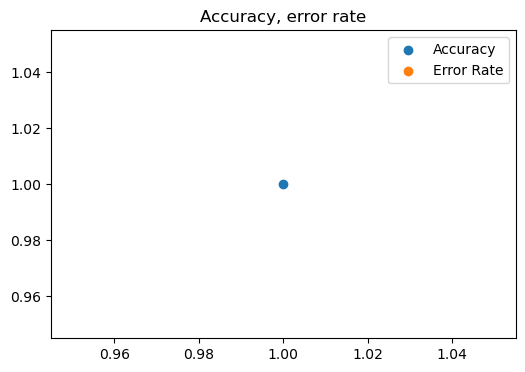

In [30]:
import numpy as np
import pandas as pd
import streamlit as st

df = pd.read_csv('./Projects/App_008_001/App_008_001_Exported/Data/penguins_cleaned.csv')

### Predicting species, given the input parameters
target = 'species'
#encode = ['island','sex']
encode = ['sex', 'island']


df02 = df[['sex', 'island']]
df02

df02 = pd.get_dummies(df02, drop_first=True).astype('int')
df02.head()

df03 = pd.concat([df, df02], axis=1)
df03 = df03.drop(columns=['island','sex'], axis=1)
df03

df03['species'].unique()
##array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

### Encoding Target 'species'

## Creating how it will be modified
## Creating the function
## Applying the function

target_mapper = {'Adelie':0,
                 'Chinstrap':1,
                 'Gentoo':2}

def target_encode(val):
    return target_mapper[val]

## Note: It is apply(target_encode) and not apply(target_encode())
df03['species'] = df03['species'].apply(target_encode)


## Verifying if encoder worked correctly
df03['species'][224:230]
df03['species'][114:120]

## X and y

X = df03.drop(columns=['species'], axis=1)
y = df03['species']


### Train Test Split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    train_size=None,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None)

#X.head(2)

#X.columns
##['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
##       'sex_male', 'island_Dream', 'island_Torgersen']


### Grid Search - Random Forest

### Model - Final model no of estimators
###
model_forest_02 = RandomForestClassifier(n_estimators=19,
                                            criterion='gini',
                                            max_depth=None,
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            bootstrap=True,
                                            oob_score=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,
                                            warm_start=False,
                                            class_weight=None,
                                            ccp_alpha=0.0,
                                            max_samples=None)

#n_estimators = range(1,101)

#param_grid_model_forest_01_grid = {'n_estimators':n_estimators}

#model_forest_01_grid = GridSearchCV(estimator=model_forest_01_to_grid,
#                                    param_grid=param_grid_model_forest_01_grid,
#                                    scoring=None,
#                                    n_jobs=None,
#                                    refit=True,
#                                    cv=None,## Default None = 5
#                                    verbose=3,
#                                    pre_dispatch='2*n_jobs',
#                                    return_train_score=False)
#

#model_forest_01_grid.fit(X_train, y_train)
model_forest_02.fit(X, y)


### Model Predictions
model_forest_02_preds = model_forest_02.predict(X)

### Model Metrics
accuracy_score_model_forest_02 = accuracy_score(y_true=y, y_pred=model_forest_02_preds, normalize=True, sample_weight=None)
error_rt_score_model_forest_02 = 1 - accuracy_score_model_forest_02

print(classification_report(y_true=y, y_pred=model_forest_02_preds,labels=None,
                            target_names=None,
                            sample_weight=None,
                            digits=2,
                            output_dict=False,
                            zero_division='warn'))

print(confusion_matrix(y_true=y, y_pred=model_forest_02_preds, labels=None, sample_weight=None, normalize=None))

ConfusionMatrixDisplay.from_estimator(estimator=model_forest_02,
                                      X=X, y=y,
                                      labels=None,
                                      sample_weight=None,
                                      normalize=None,
                                      display_labels=None,
                                      include_values=True,
                                      xticks_rotation='horizontal',
                                      values_format=None,
                                      cmap='viridis',
                                      ax=None,
                                      colorbar=True)

plt.figure(figsize=(6,4))
plt.scatter(accuracy_score_model_forest_02, accuracy_score_model_forest_02)
plt.scatter(error_rt_score_model_forest_02, error_rt_score_model_forest_02)
plt.show()

print("\n")

print(classification_report(y_true=y, y_pred=model_forest_02_preds,
                            labels=None,
                            target_names=None,
                            sample_weight=None,
                            digits=2,
                            output_dict=False,
                            zero_division='warn'))

print("\n")

print(confusion_matrix(y_true=y, y_pred=model_forest_02_preds, labels=None, sample_weight=None, normalize=None))

print("\n")

ConfusionMatrixDisplay.from_estimator(estimator=model_forest_02,
                                      X=X, y=y,
                                      labels=None,
                                      sample_weight=None,
                                      normalize=None,
                                      display_labels=None,
                                      include_values=True,
                                      xticks_rotation='horizontal',
                                      values_format=None,
                                      cmap='viridis',
                                      ax=None,
                                      colorbar=True)

print("\n")

ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=model_forest_02_preds,
                                        labels=None,
                                        sample_weight=None,
                                        normalize=None,
                                        display_labels=None,
                                        include_values=True,
                                        xticks_rotation='horizontal',
                                        values_format=None,
                                        cmap='viridis',
                                        ax=None,
                                        colorbar=True,)

print("\n")

fig = plt.figure(figsize=(6,4))
plt.scatter(accuracy_score_model_forest_02, accuracy_score_model_forest_02, label='Accuracy')
plt.scatter(error_rt_score_model_forest_02, error_rt_score_model_forest_02, label='Error Rate')

plt.title("Accuracy, error rate")
plt.legend()

plt.show()

###97% of accuracy
### f1 score is good for all
### the model had 2 missclassiciations on the True label 1. 

#Decision the model's performance is good. I will use this model but will train it with the wntire dataset (With X and not with X_train)





In [31]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_male,island_Dream,island_Torgersen
0,39.1,18.7,181,3750,1,0,1
1,39.5,17.4,186,3800,0,0,1
2,40.3,18.0,195,3250,0,0,1
3,36.7,19.3,193,3450,0,0,1
4,39.3,20.6,190,3650,1,0,1


In [32]:
X.columns
##Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
##       'sex_male', 'island_Dream', 'island_Torgersen'],
##      dtype='object')

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex_male', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [ ]:
## Saving Model

In [33]:
import pickle
pickle.dump(model_forest_02, open('./Projects/App_008_001/App_008_001_Exported/Data/Saved_Models/model_02.pkl', 'wb'))


In [ ]:
## Opening saved model

In [34]:
with open('./Projects/App_008_001/App_008_001_Exported/Data/Saved_Models/model_02.pkl', 'rb') as pickle_file:
    model_02_loaded = pickle.load(pickle_file)


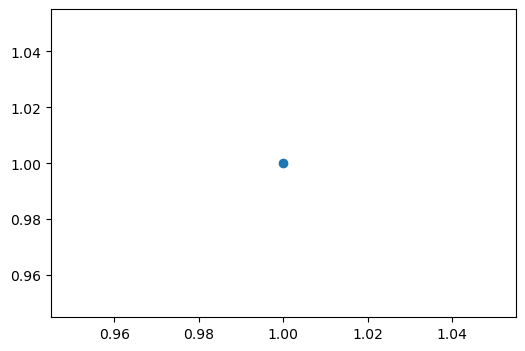



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



[[146   0   0]
 [  0  68   0]
 [  0   0 119]]








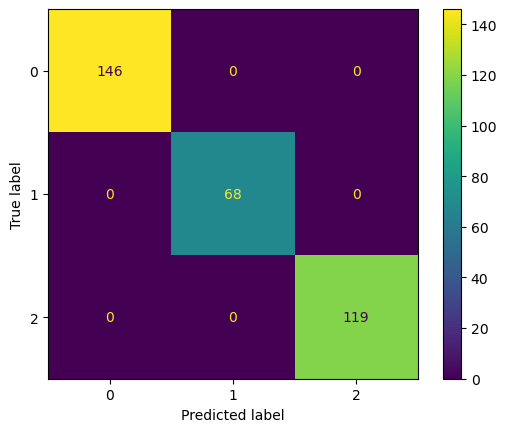

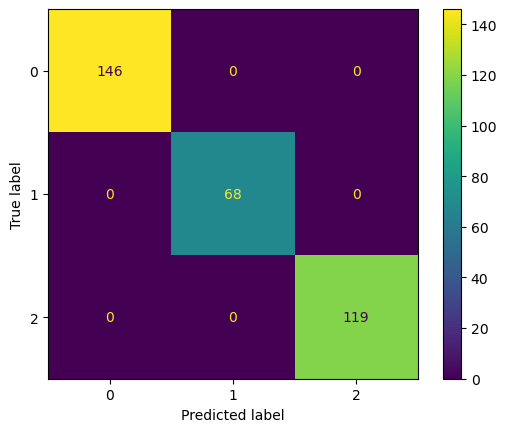

In [35]:
### Model Predictions
model_forest_02_loaded_preds = model_02_loaded.predict(X)

### Model Metrics
accuracy_score_model_forest_02_loaded = accuracy_score(y_true=y, y_pred=model_forest_02_loaded_preds, normalize=True, sample_weight=None)
error_rt_score_model_forest_02_loaded = 1 - accuracy_score_model_forest_02_loaded

plt.figure(figsize=(6,4))
plt.scatter(accuracy_score_model_forest_02_loaded, accuracy_score_model_forest_02_loaded)
plt.scatter(error_rt_score_model_forest_02_loaded, error_rt_score_model_forest_02_loaded)
plt.show()

print("\n")

print(classification_report(y_true=y, y_pred=model_forest_02_loaded_preds,
                            labels=None,
                            target_names=None,
                            sample_weight=None,
                            digits=2,
                            output_dict=False,
                            zero_division='warn'))

print("\n")

print(confusion_matrix(y_true=y, y_pred=model_forest_02_loaded_preds, labels=None, sample_weight=None, normalize=None))

print("\n")

ConfusionMatrixDisplay.from_estimator(estimator=model_02_loaded,
                                      X=X, y=y,
                                      labels=None,
                                      sample_weight=None,
                                      normalize=None,
                                      display_labels=None,
                                      include_values=True,
                                      xticks_rotation='horizontal',
                                      values_format=None,
                                      cmap='viridis',
                                      ax=None,
                                      colorbar=True)

print("\n")

ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=model_forest_02_loaded_preds,
                                        labels=None,
                                        sample_weight=None,
                                        normalize=None,
                                        display_labels=None,
                                        include_values=True,
                                        xticks_rotation='horizontal',
                                        values_format=None,
                                        cmap='viridis',
                                        ax=None,
                                        colorbar=True,)

print("\n")


#Decision the model's performance is good. I will use this model but will train it with the wntire dataset (With X and not with X_train)





Model trained on following features
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex_male', 'island_Dream', 'island_Torgersen'],
      dtype='object')